In [40]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import io
from scipy import stats
import pickle
import pandas as pd
import seaborn as sns

load_folder='/Users/kendranoneman/Projects/mayo/NeuralDecoding/runs/'
fig_folder='/Users/kendranoneman/Projects/mayo/NeuralDecoding/figures/' 

ill=0 #Whether I am making these plots for exporting to adobe illustrator (in which case I remove the text)
colors=['purple', 'blue','cyan','mediumaquamarine','green','yellowgreen','gold','orange', 'magenta', 'red','gray'] #Colors to plot each method

In [41]:
R2s_all = np.empty([5,8])
rhos_all = np.empty([5,8])
times_all = np.empty([5,8])

y_train_wf = []
y_test_wf = []
y_train_pred_wf = []
y_test_pred_wf = []
for fold in range(5):
    with open(load_folder+'s0-t0-d50-m0-o0-nm24-nf41-bn0-fo5-fi5/'+'fold_'+str(fold)+'.pickle','rb') as f:
        y_train,y_test,y_train_pred,y_test_pred,R2s,rhos,time_elapsed=pickle.load(f,encoding='latin1')
        y_train_wf.append(y_train)
        y_test_wf.append(y_test)
        y_train_pred_wf.append(y_train_pred)
        y_test_pred_wf.append(y_test_pred)
        R2s_all[fold][0] = R2s
        rhos_all[fold][0] = rhos
        times_all[fold][0] = time_elapsed
        
y_train_wc = []
y_test_wc = []
y_train_pred_wc = []
y_test_pred_wc = []
for fold in range(5):
    with open(load_folder+'s0-t0-d50-m1-o0-nm24-nf41-bn0-fo5-fi5/'+'fold_'+str(fold)+'.pickle','rb') as f:
        y_train,y_test,y_train_pred,y_test_pred,R2s,rhos,time_elapsed=pickle.load(f,encoding='latin1')
        y_train_wc.append(y_train)
        y_test_wc.append(y_test)
        y_train_pred_wc.append(y_train_pred)
        y_test_pred_wc.append(y_test_pred)
        R2s_all[fold][1] = R2s
        rhos_all[fold][1] = rhos
        times_all[fold][1] = time_elapsed
        
y_train_xgb = []
y_test_xgb = []
y_train_pred_xgb = []
y_test_pred_xgb = []
for fold in range(5):
    with open(load_folder+'s0-t0-d50-m2-o0-nm24-nf41-bn0-fo5-fi5/'+'fold_'+str(fold)+'.pickle','rb') as f:
        y_train,y_test,y_train_pred,y_test_pred,R2s,rhos,time_elapsed=pickle.load(f,encoding='latin1')
        y_train_xgb.append(y_train)
        y_test_xgb.append(y_test)
        y_train_pred_xgb.append(y_train_pred)
        y_test_pred_xgb.append(y_test_pred)
        R2s_all[fold][2] = R2s
        rhos_all[fold][2] = rhos
        times_all[fold][2] = time_elapsed
        
y_train_svr = []
y_test_svr = []
y_train_pred_svr = []
y_test_pred_svr = []
for fold in range(5):
    with open(load_folder+'s0-t0-d50-m3-o0-nm24-nf41-bn0-fo5-fi5/'+'fold_'+str(fold)+'.pickle','rb') as f:
        y_train,y_test,y_train_pred,y_test_pred,R2s,rhos,time_elapsed=pickle.load(f,encoding='latin1')
        y_train_svr.append(y_train)
        y_test_svr.append(y_test)
        y_train_pred_svr.append(y_train_pred)
        y_test_pred_svr.append(y_test_pred)
        R2s_all[fold][3] = R2s
        rhos_all[fold][3] = rhos
        times_all[fold][3] = time_elapsed
        
y_train_dnn = []
y_test_dnn = []
y_train_pred_dnn = []
y_test_pred_dnn = []
for fold in range(5):
    with open(load_folder+'s0-t0-d50-m4-o0-nm24-nf41-bn0-fo5-fi5/'+'fold_'+str(fold)+'.pickle','rb') as f:
        y_train,y_test,y_train_pred,y_test_pred,R2s,rhos,time_elapsed=pickle.load(f,encoding='latin1')
        y_train_dnn.append(y_train)
        y_test_dnn.append(y_test)
        y_train_pred_dnn.append(y_train_pred)
        y_test_pred_dnn.append(y_test_pred)
        R2s_all[fold][4] = R2s
        rhos_all[fold][4] = rhos
        times_all[fold][4] = time_elapsed
        
df_r2 = pd.DataFrame(R2s_all, columns = ['wf','wc','xgb','svr','dnn','rnn','gru','lstm'])
df_rho = pd.DataFrame(rhos_all, columns = ['wf','wc','xgb','svr','dnn','rnn','gru','lstm'])
df_te = pd.DataFrame(times_all, columns = ['wf','wc','xgb','svr','dnn','rnn','gru','lstm'])
print(df_r2)
print(df_rho)
print(df_te)

print("\n")
print(df_r2.loc[:, 'wf'].mean())

         wf        wc       xgb       svr       dnn            rnn   
0  0.321132  0.322164  0.408323  0.177772  0.477264  2.364909e-314  \
1  0.338820  0.338221  0.429800  0.175124  0.481499  2.364923e-314   
2  0.325890  0.325890  0.391750  0.175629  0.464362  2.364925e-314   
3  0.316736  0.317484  0.402164  0.173628  0.451742  2.364910e-314   
4  0.310335  0.309714  0.388049  0.167206  0.453950  2.364928e-314   

             gru           lstm  
0  2.364897e-314  2.144459e-314  
1  2.364910e-314  2.364924e-314  
2  2.159610e-314  2.364925e-314  
3  2.364926e-314  2.364928e-314  
4  2.364891e-314  2.781342e-308  
         wf        wc       xgb       svr       dnn            rnn   
0  0.576946  0.577814  0.646267  0.597660  0.693345   0.000000e+00  \
1  0.584971  0.584349  0.658319  0.592931  0.704583  2.460447e-321   
2  0.572296  0.572296  0.627221  0.606471  0.690531   0.000000e+00   
3  0.571250  0.571949  0.639751  0.604102  0.684559  2.356693e-321   
4  0.570594  0.570221  0.

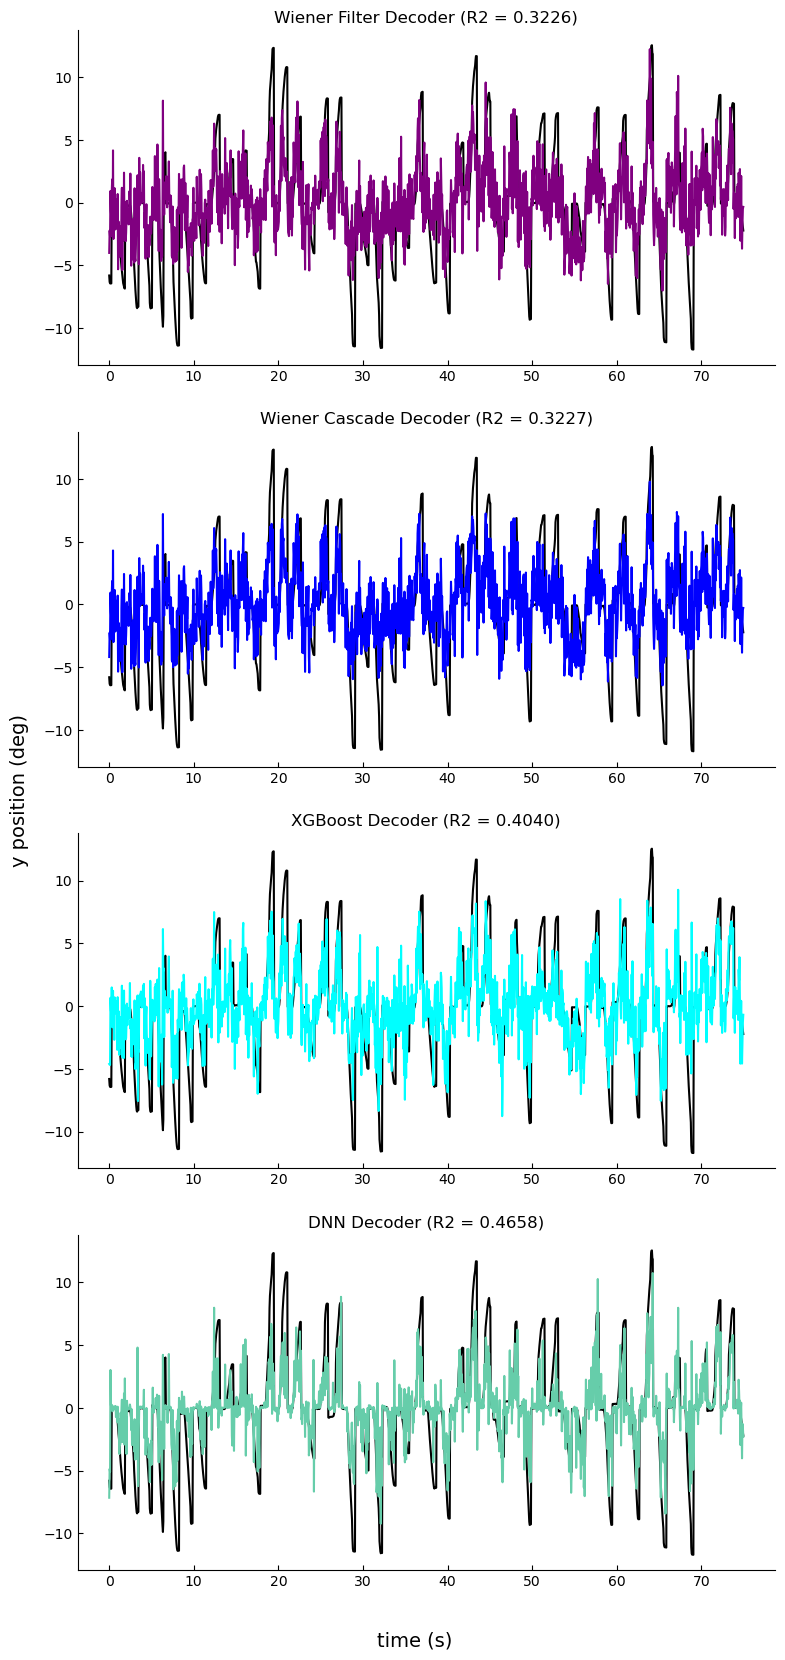

In [150]:
ts=np.arange(0,1500) #Plot samples 500-800

fig_traces, ax = plt.subplots(4,1,figsize=(9,20)) #Create figure (11 rows by 3 columns)

m=0 #Initialize method number. This corresponds to the row we're currently plotting in.
x = (ts*50)/1000

#WF
ax[m].plot(x,y_test_wf[1][ts,1],'k') #Plot actual
ax[m].plot(x,y_test_pred_wf[1][ts,1],colors[m]) #Plot predictions, in color specified in user options section
ax[m].tick_params(direction='in') #Make ticks inward
ax[m].set_title('Wiener Filter Decoder (R2 = {:.4f})'.format(df_r2.loc[:, 'wf'].mean()))
#Set y limit and ticks
#ax[m].set_ylim([-100,100])
#ax[m].set_yticks(np.arange(-100,100.1,50))

#ax[m].set_xlim([0,t_len]) #Set x limit
ax[m].spines['right'].set_color('none') #Remove right boundary
ax[m].spines['top'].set_color('none') #Remove top boundary
#If plotting for illustrator, remove text
if ill:
    ax[m].set_xticklabels('')
    ax[m].set_yticklabels('')
m=m+1 #Increase method index, so the next method gets plotted on the next row

#WC
ax[m].plot(x,y_test_wc[1][ts,1],'k') #Plot actual
ax[m].plot(x,y_test_pred_wc[1][ts,1],colors[m]) #Plot predictions, in color specified in user options section
ax[m].tick_params(direction='in') #Make ticks inward
ax[m].set_title('Wiener Cascade Decoder (R2 = {:.4f})'.format(df_r2.loc[:, 'wc'].mean()))
#Set y limit and ticks
#ax[m].set_ylim([-100,100])
#ax[m].set_yticks(np.arange(-100,100.1,50))

#ax[m].set_xlim([0,t_len]) #Set x limit
ax[m].spines['right'].set_color('none') #Remove right boundary
ax[m].spines['top'].set_color('none') #Remove top boundary
#If plotting for illustrator, remove text
if ill:
    ax[m].set_xticklabels('')
    ax[m].set_yticklabels('')
m=m+1 #Increase method index, so the next method gets plotted on the next row

#XGB
ax[m].plot(x,y_test_xgb[1][ts,1],'k') #Plot actual
ax[m].plot(x,y_test_pred_xgb[1][ts,1],colors[m]) #Plot predictions, in color specified in user options section
ax[m].tick_params(direction='in') #Make ticks inward
ax[m].set_title('XGBoost Decoder (R2 = {:.4f})'.format(df_r2.loc[:, 'xgb'].mean()))
#Set y limit and ticks
#ax[m].set_ylim([-100,100])
#ax[m].set_yticks(np.arange(-100,100.1,50))

#ax[m].set_xlim([0,t_len]) #Set x limit
ax[m].spines['right'].set_color('none') #Remove right boundary
ax[m].spines['top'].set_color('none') #Remove top boundary
#If plotting for illustrator, remove text
if ill:
    ax[m].set_xticklabels('')
    ax[m].set_yticklabels('')
m=m+1 #Increase method index, so the next method gets plotted on the next row

'''
#SVR
ax[m].plot(y_test_svr[1][ts,1],'k') #Plot actual
ax[m].plot(y_test_pred_svr[1][ts,1],colors[m]) #Plot predictions, in color specified in user options section
ax[m].tick_params(direction='in') #Make ticks inward
ax[m].set_title('SVR Decoder (R2 = {:.4f})'.format(df_r2.loc[:, 'svr'].mean()))
#Set y limit and ticks
#ax[m].set_ylim([-100,100])
#ax[m].set_yticks(np.arange(-100,100.1,50))

#ax[m].set_xlim([0,t_len]) #Set x limit
ax[m].spines['right'].set_color('none') #Remove right boundary
ax[m].spines['top'].set_color('none') #Remove top boundary
#If plotting for illustrator, remove text
if ill:
    ax[m].set_xticklabels('')
    ax[m].set_yticklabels('')
m=m+1 #Increase method index, so the next method gets plotted on the next row
'''

#DNN
ax[m].plot(x,y_test_dnn[1][ts,1],'k') #Plot actual
ax[m].plot(x,y_test_pred_dnn[1][ts,1],colors[m]) #Plot predictions, in color specified in user options section
ax[m].tick_params(direction='in') #Make ticks inward
ax[m].set_title('DNN Decoder (R2 = {:.4f})'.format(df_r2.loc[:, 'dnn'].mean()))
#Set y limit and ticks
#ax[m].set_ylim([-100,100])
#ax[m].set_yticks(np.arange(-100,100.1,50))

#ax[m].set_xlim([0,t_len]) #Set x limit
ax[m].spines['right'].set_color('none') #Remove right boundary
ax[m].spines['top'].set_color('none') #Remove top boundary
#If plotting for illustrator, remove text
if ill:
    ax[m].set_xticklabels('')
    ax[m].set_yticklabels('')
m=m+1 #Increase method index, so the next method gets plotted on the next row

fig_traces.supxlabel('time (s)',y=0.07, fontsize=14)
fig_traces.supylabel('y position (deg)',x=0.05, fontsize=14)

fig_traces.savefig('pos_traces.png')

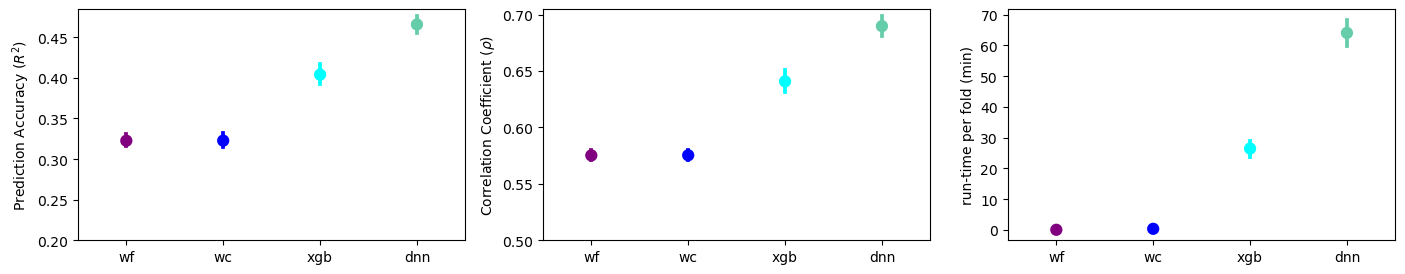

In [151]:
fig, axes = plt.subplots(1,3,figsize=(17,3)) #Create figure (11 rows by 3 columns)

m=0
a = sns.pointplot(ax=axes[m],data=df_r2[['wf','wc','xgb','dnn']],join=False,palette=colors[0:4])
a.set(ylim=(0.2, None))
a.set(ylabel='Prediction Accuracy ($R^2$)')

m=m+1
a2 = sns.pointplot(ax=axes[m],data=df_rho[['wf','wc','xgb','dnn']],join=False,palette=colors)
a2.set(ylim=(0.5, None))
a2.set(ylabel=r'Correlation Coefficient ($\rho$)')

m=m+1
a2 = sns.pointplot(ax=axes[m],data=(df_te[['wf','wc','xgb','dnn']])/60,join=False,palette=colors)
#a2.set(ylim=(0.5, None))
a2.set(ylabel='run-time per fold (min)')

fig.savefig('model_perf.png')